In [1]:
import time
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,Image,HTML
import itertools
import numba as nb
import numpy as np

### Puzzle as published 
https://www.janestreet.com/puzzles/lesses-more-index/

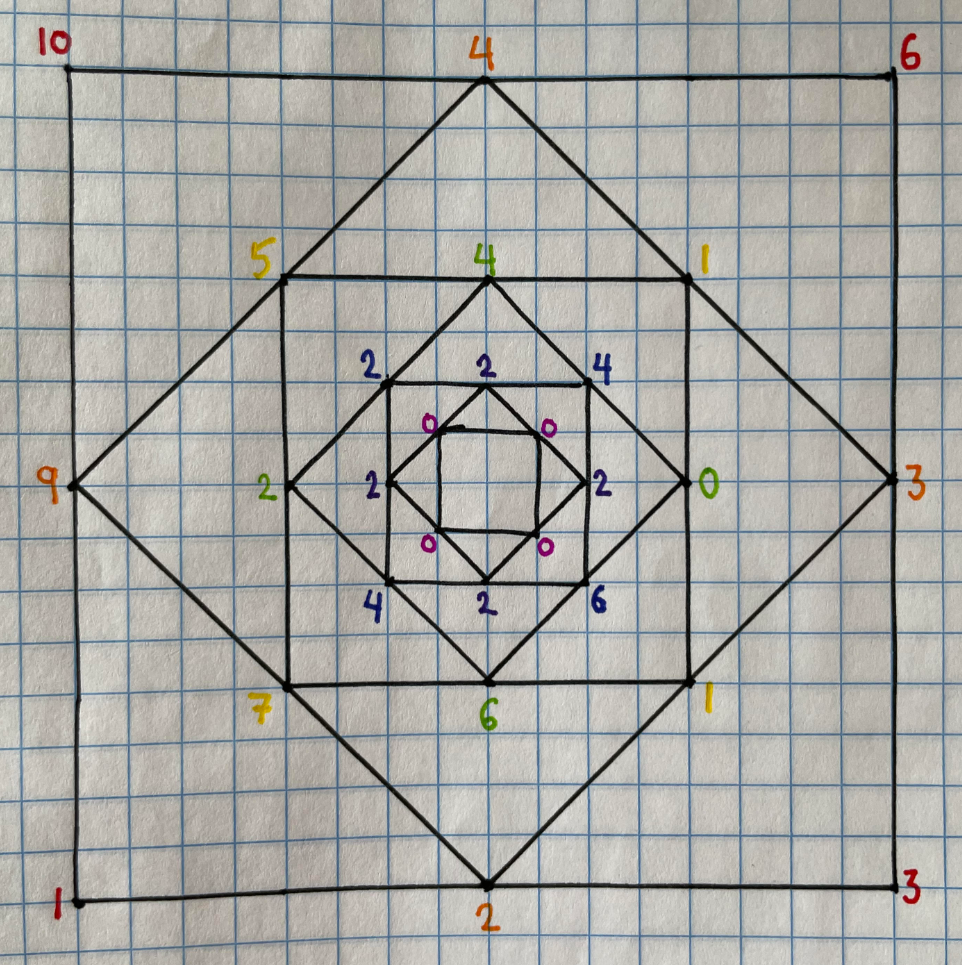

In [2]:
url='https://www.janestreet.com/puzzles/lesses-more-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
tags=soup.findAll('img')
for match in tags:
    match.decompose()

display(Markdown('### Puzzle as published \n'+url))
display(Image('https://www.janestreet.com/puzzles/lesses-more.png',width=200))
HTML(str(soup.find_all('div', {'class' :'col-12'})[0])+str(soup.find_all('div', {'class' :'col-12'})[4]))

In [3]:
@nb.njit(cache=True)
def f(a,b,c,d):
    return abs(a-b),abs(b-c),abs(c-d),abs(d-a)

@nb.njit
def steps(a,b,c,d):
    count = 1
    stop = 1
    while stop:
        w,x,y,z = f(a,b,c,d)
        a,b,c,d = w,x,y,z
        count +=1
        if sum([w,x,y,z]) == 0:
            stop = 0
    return count

@nb.njit
def steps_show(a,b,c,d):
    count = 1
    stop = 1
    print("Row :", count," = ",a,b,c,d)    
    while stop:
        count +=1
        w,x,y,z = f(a,b,c,d)
        print("Row :", count," = ",w,x,y,z)
        a,b,c,d = w,x,y,z
        if sum([w,x,y,z]) == 0:
            stop = 0
    return count

@nb.njit
def steps_output(a,b,c,d):
    count = 1
    stop = 1
    data = [(a,b,c,d)]
    while stop:
        count +=1
        w,x,y,z = f(a,b,c,d)
        a,b,c,d = w,x,y,z
        data.append((a,b,c,d))
        if sum([w,x,y,z]) == 0:
            stop = 0
    return data

In [4]:
@nb.njit
def main(N):
    best = 0
    for a in range(1,int(N/3)):
        for b in range(1,N-2*a):
            for c in range(1,N-a-b):
                soln = steps(0,a,a+b,a+b+c)
                if soln> best:
                    print("\n",0,a,a+b,a+b+c,"takes",soln)
                    steps_show(0,a,a+b,a+b+c)
                    best = soln


In [5]:
start = time.time()
main(500)
print("Took {:.3f} seconds".format(time.time()-start))


 0 1 2 3 takes 6
Row : 1  =  0 1 2 3
Row : 2  =  1 1 1 3
Row : 3  =  0 0 2 2
Row : 4  =  0 2 0 2
Row : 5  =  2 2 2 2
Row : 6  =  0 0 0 0

 0 1 2 4 takes 8
Row : 1  =  0 1 2 4
Row : 2  =  1 1 2 4
Row : 3  =  0 1 2 3
Row : 4  =  1 1 1 3
Row : 5  =  0 0 2 2
Row : 6  =  0 2 0 2
Row : 7  =  2 2 2 2
Row : 8  =  0 0 0 0

 0 1 4 9 takes 9
Row : 1  =  0 1 4 9
Row : 2  =  1 3 5 9
Row : 3  =  2 2 4 8
Row : 4  =  0 2 4 6
Row : 5  =  2 2 2 6
Row : 6  =  0 0 4 4
Row : 7  =  0 4 0 4
Row : 8  =  4 4 4 4
Row : 9  =  0 0 0 0

 0 2 5 11 takes 10
Row : 1  =  0 2 5 11
Row : 2  =  2 3 6 11
Row : 3  =  1 3 5 9
Row : 4  =  2 2 4 8
Row : 5  =  0 2 4 6
Row : 6  =  2 2 2 6
Row : 7  =  0 0 4 4
Row : 8  =  0 4 0 4
Row : 9  =  4 4 4 4
Row : 10  =  0 0 0 0

 0 2 6 13 takes 11
Row : 1  =  0 2 6 13
Row : 2  =  2 4 7 13
Row : 3  =  2 3 6 11
Row : 4  =  1 3 5 9
Row : 5  =  2 2 4 8
Row : 6  =  0 2 4 6
Row : 7  =  2 2 2 6
Row : 8  =  0 0 4 4
Row : 9  =  0 4 0 4
Row : 10  =  4 4 4 4
Row : 11  =  0 0 0 0

 0 5 14 31 takes 

In [6]:
def build(data):
    if (data[0,3]-data[0,2]-data[0,1]) % 2 == 1:
        add = (2*data[0,3]-2*data[0,2]-2*data[0,1]) // 2
        second = data[0,:]*2+add
        top = np.array([0,second[0],second[0]+second[1],second[3]])
        new_rows = [top,second]
        outputs = np.concatenate([new_rows,data[1:,:]*2],axis=0)
    else:
        add = (data[0,3]-data[0,2]-data[0,1])//2
        second = data[0,:]+add
        top = np.array([0,second[0],second[0]+second[1],second[3]])
        new_rows = [top,second]
        outputs = np.concatenate([new_rows,data[1:,:]],axis=0)
    return outputs
        

In [8]:
inputs = np.array(steps_output(0,68,193,423))

while True:
    data = build(inputs)
    if data[0,3] < 10e6:
        inputs=data
        print(inputs.shape[0],end=" ")
    else:
        break
print("\n\n Answer is :",";".join([str(i) for i in inputs[0,:]]),"\n")
print(inputs)

20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 

 Answer is : 0;1389537;3945294;8646064 

[[      0 1389537 3945294 8646064]
 [1389537 2555757 4700770 8646064]
 [1166220 2145013 3945294 7256527]
 [ 978793 1800281 3311233 6090307]
 [ 821488 1510952 2779074 5111514]
 [ 689464 1268122 2332440 4290026]
 [ 578658 1064318 1957586 3600562]
 [ 485660  893268 1642976 3021904]
 [ 407608  749708 1378928 2536244]
 [ 342100  629220 1157316 2128636]
 [ 287120  528096  971320 1786536]
 [ 240976  443224  815216 1499416]
 [ 202248  371992  684200 1258440]
 [ 169744  312208  574240 1056192]
 [ 142464  262032  481952  886448]
 [ 119568  219920  404496  743984]
 [ 100352  184576  339488  624416]
 [  84224  154912  284928  524064]
 [  70688  130016  239136  439840]
 [  59328  109120  200704  369152]
 [  49792   91584  168448  309824]
 [  41792   76864  141376  260032]
 [  35072   64512  118656  218240]
 [  29440   54144   99584  183168]
 [  24704   45440   83584  153728]
 [  207

In [7]:
url='https://www.janestreet.com/puzzles/lesses-more-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
tags=soup.findAll('img')
for match in tags:
    match.decompose()

display(Markdown('### Solution as published \n'+url))
HTML(str(soup.find_all('div', {'class' :'col-12'})[0])+str(soup.find_all('div', {'class' :'col-12'})[3]))

### Solution as published 
https://www.janestreet.com/puzzles/lesses-more-solution/

"f((a,b,c,d)) = (",a-b,",",b-c,",",c-d,",",d-a,).
